# Jupyter Notebook - Ottawa River Temperature

CSI4506 Introduction à l’intelligence artificielle

Marcel Turcotte (École de sience informatique et de génie électrique,
Université d’Ottawa)  
2025-09-05

# Objectifs d’apprentissage

-   **Démontrer** une compréhension de base des Jupyter Notebooks.

-   **Exécuter** des cellules de code dans les Jupyter Notebooks en
    utilisant Google Colab.

-   **Modifier** un Jupyter Notebook avec des changements simples et
    exécuter les cellules de code mises à jour dans Google Colab.

# Démarrage rapide

## Utiliser ce cahier en ligne sans rien installer

Bien que les spécificités du code seront discutées dans les cahiers
suivants, il est important de noter que celui-ci nécessite
l’installation de [pandas](https://pandas.pydata.org) et
[matplotlib](https://matplotlib.org). Ces bibliothèques sont
préinstallées sur [Google Colab](https://colab.research.google.com),
facilitant ainsi leur utilisation immédiate. Il faut cependant un compte
Google afin d’exécuter le document.

<a target="_blank" href="https://colab.research.google.com/github/turcotte/csi4506-a25/blob/main/notebooks/computing/01/01_ottawa_river_temperature.ipynb">

<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>

</a>

Si vous consultez ce document sur le site du cours, vous voyez le
résultat de la conversion d’un Jupyter Notebook en HTML. Vous pouvez
télécharger le Jupyter Notebook correspondant à partir du sommaire,
généralement situé dans le coin supérieur droit lorsque vous naviguez
sur un ordinateur. Alternativement, vous pouvez le télécharger
directement [ici](01_ottawa_river_temperature.ipynb).

## Consulter ce cahier sans exécuter de code

<a target="_blank" href="https://nbviewer.jupyter.org/github/turcotte/csi4506-a25/blob/main/notebooks/computing/01/01_ottawa_river_temperature.ipynb">

<img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" alt="Open In nbviewer"/>

</a>

# Concepts

Un Jupyter notebook est un environnement de calcul interactif qui
combine l’exécution de code, du texte et des multimédias dans un seul
document. Voici les composants clés d’un Jupyter notebook :

## Cellules

-   **Cellules de code :** Ces cellules contiennent du code exécutable,
    généralement en Python, mais d’autres langages comme R, Julia et
    Scala sont également pris en charge. Le code est exécuté dans le
    noyau, et le résultat est affiché directement sous la cellule.

-   **Cellules Markdown :** Ces cellules contiennent du texte formaté en
    utilisant Markdown. Elles sont utilisées pour ajouter des
    explications, des en-têtes, des listes à puces, des liens, des
    images et d’autres textes formatés au cahier.

-   **Cellules brutes :** Ces cellules contiennent du texte qui n’est
    pas destiné à être exécuté ou rendu. Elles sont utiles pour inclure
    des extraits de code ou du texte qui doit rester non formaté.

## Exécution

-   **Sortie standard :** Le résultat de l’exécution du code, y compris
    le texte, les tableaux et les graphiques, est affiché directement
    sous la cellule de code.

-   **Sortie multimédia enrichie :** Les Jupyter notebooks prennent en
    charge la sortie multimédia enrichie comme le HTML, les images, les
    vidéos, LaTeX et les widgets interactifs (par exemple, Plotly,
    Bokeh).

# Température de la rivière des Outaouais

Dans cet exemple, nous utilisons le jeu de données [**Température de la
rivière des
Outaouais**](https://open.ottawa.ca/documents/2dff4bca304f4308996681aa6265f64d/about),
disponible via le [portail des données ouvertes de la Ville
d’Ottawa](https://open.ottawa.ca).

## Importation des bibliothèques nécessaires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import BytesIO

## Récupération des données

> **Warning**
>
> Lors de l’utilisation de Google Colab, il est essentiel de reconnaître
> que vous travaillez dans un environnement temporaire. Toutes les
> données ou modifications apportées seront supprimées après la fin de
> la session. Il est donc impératif de télécharger et de stocker en
> toute sécurité toutes les données ou résultats que vous souhaitez
> conserver.
>
> Vous êtes également responsable de vous assurer que le code source de
> vos devoirs reste privé et n’est pas accessible publiquement.

In [2]:
# URL du fichier Excel
url = 'https://www.arcgis.com/sharing/rest/content/items/2dff4bca304f4308996681aa6265f64d/data'

# Récupérer le fichier Excel depuis le web
response = requests.get(url)
response.raise_for_status() # Assurez-vous de remarquer les mauvaises réponses

## Lecture du fichier Excel

In [3]:
# Lire le fichier Excel dans un DataFrame pandas
df = pd.read_excel(BytesIO(response.content), sheet_name='Britannia raw water temperature', header=None)

## Extraction des données du fichier Excel

Les colonnes B à U contiennent les températures moyennes quotidiennes
pour chaque année de 2005 à 2023, chaque colonne correspondant à une
année spécifique. Les lignes 11 à 375 représentent les valeurs moyennes
quotidiennes, où la ligne 11 correspond au 1er janvier et la ligne 375
correspond au 31 décembre. Par exemple, la cellule B11 contient la
température moyenne du 1er janvier 2005, tandis que la cellule U375
contient la température moyenne du 31 décembre 2023.

In [4]:
# Définir la plage d'années et les colonnes
years = range(2005, 2023 + 1) # Jusqu'à 2023 selon votre description
columns = range(1, 21) # Colonnes B à U (indexées à 1 dans Excel, indexées à 0 dans pandas)

# Préparer un dictionnaire pour contenir les données
data = {}

# Extraire les données pour chaque année
for year, col in zip(years, columns):
    # Note : B11 à B375 correspond aux indices de ligne 10 à 374 dans pandas (indexés à 0)
    data[year] = df.iloc[10:375, col].values

## Tracer les données

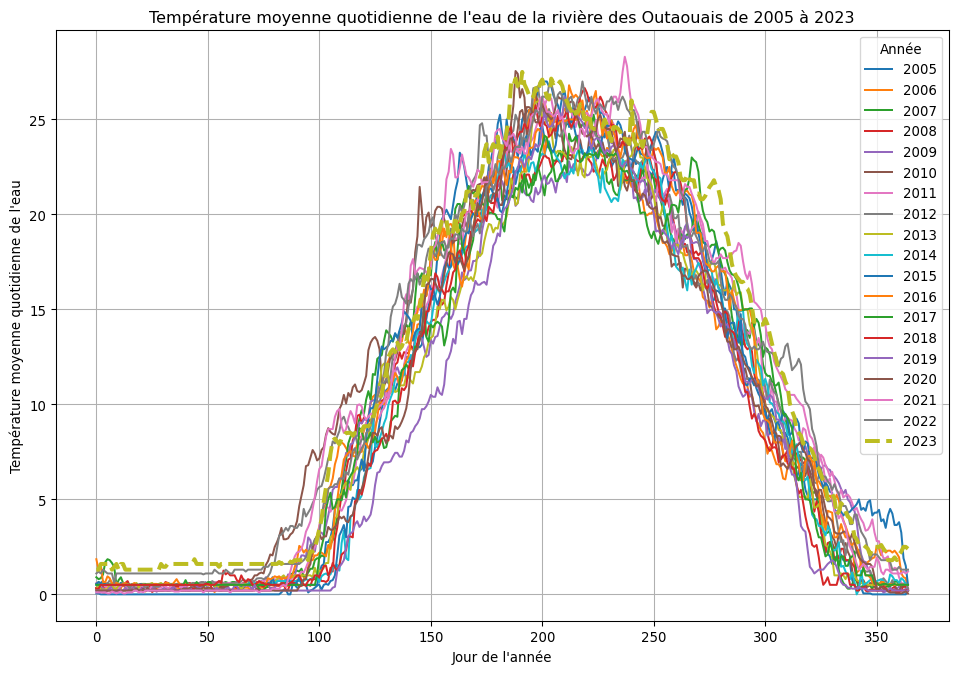

In [5]:
# Tracer les données
plt.figure(figsize=(12, 8))

for year in years:
    if year == 2023:
        plt.plot(data[year], label=str(year), linewidth=3, linestyle='--')
    else:
        plt.plot(data[year], label=str(year))

plt.xlabel('Jour de l\'année')
plt.ylabel('Température moyenne quotidienne de l\'eau')
plt.title('Température moyenne quotidienne de l\'eau de la rivière des Outaouais de 2005 à 2023')
plt.legend(title='Année')
plt.grid(True)
plt.show()

# Expérimentations

Familiarisez-vous avec la technologie en effectuant les tâches suivantes
:

1.  Modifiez la plage d’années pour qu’elle s’étende de 2000 à 2023 et
    régénérez le graphique.
2.  Référez-vous à la
    [documentation](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html)
    pour changer le style de ligne.
3.  Faméliarisez-vous for format
    [markdown](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).